In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/ds-salaries/ds_salaries.csv")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.shape

(3755, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.corr()

/tmp/ipykernel_34/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


In [7]:
def replace_value(column_name, old_value, new_value):
    df[column_name] = df[column_name].replace(old_value,new_value)

In [8]:
replace_value("experience_level","SE", "Senior Level")
replace_value("experience_level","MI", "Mid Level")
replace_value("experience_level","EN", "Entry Level")
replace_value("experience_level","EX", "Executive Level")

In [9]:
replace_value("employment_type","FT","Full Time")
replace_value("employment_type","PT","Part Time")
replace_value("employment_type","CT","Contract")
replace_value("employment_type","FL","Freelancing")

In [10]:
replace_value("company_size","M","Medium")
replace_value("company_size","S","Small")
replace_value("company_size","L","Large")

In [11]:
replace_value("remote_ratio",100,"Remote")
replace_value("remote_ratio",0,"Onsite")
replace_value("remote_ratio",50,"Hybrid")

In [12]:
replace_value("job_title","Machine Learning Engineer","ML Engineer")

In [13]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,Full Time,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,Large
1,2023,Mid Level,Contract,ML Engineer,30000,USD,30000,US,Remote,US,Small
2,2023,Mid Level,Contract,ML Engineer,25500,USD,25500,US,Remote,US,Small
3,2023,Senior Level,Full Time,Data Scientist,175000,USD,175000,CA,Remote,CA,Medium
4,2023,Senior Level,Full Time,Data Scientist,120000,USD,120000,CA,Remote,CA,Medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level,Full Time,Data Scientist,412000,USD,412000,US,Remote,US,Large
3751,2021,Mid Level,Full Time,Principal Data Scientist,151000,USD,151000,US,Remote,US,Large
3752,2020,Entry Level,Full Time,Data Scientist,105000,USD,105000,US,Remote,US,Small
3753,2020,Entry Level,Contract,Business Data Analyst,100000,USD,100000,US,Remote,US,Large


In [14]:
!pip install pycountry
import pycountry as pc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.2 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=5ef51480fc9b1faf21283453a64726ef0c06ecd0612829552be48361df1d8f5b
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [15]:
df['employee_residence'] = df['employee_residence'].apply(lambda x: pc.countries.get(alpha_2 = x).name)

In [16]:
df['company_location'] = df['company_location'].apply(lambda x: pc.countries.get(alpha_2 = x).name)

In [17]:
df.drop(['salary','salary_currency'],axis=1,inplace=True)

In [18]:
import matplotlib.pyplot as plt

In [19]:
def value_count_plot(text):
    row = 2
    column = 4
    fig, ax = plt.subplots(row,column,figsize = (20,12))
    j = 0
    k = 0
    for i in text:
        if k<row and j<column+1:
            df[i].value_counts().head().plot(kind="bar", ax = ax[k,j])
            ax[k,j].set_xticklabels(ax[k,j].get_xticklabels(), rotation=20)
            ax[k,j].set_title(i)
            ax[k,j].set_ylabel('Number of Instances')
            j+=1
            if j==4:
                k+=1
                j=0

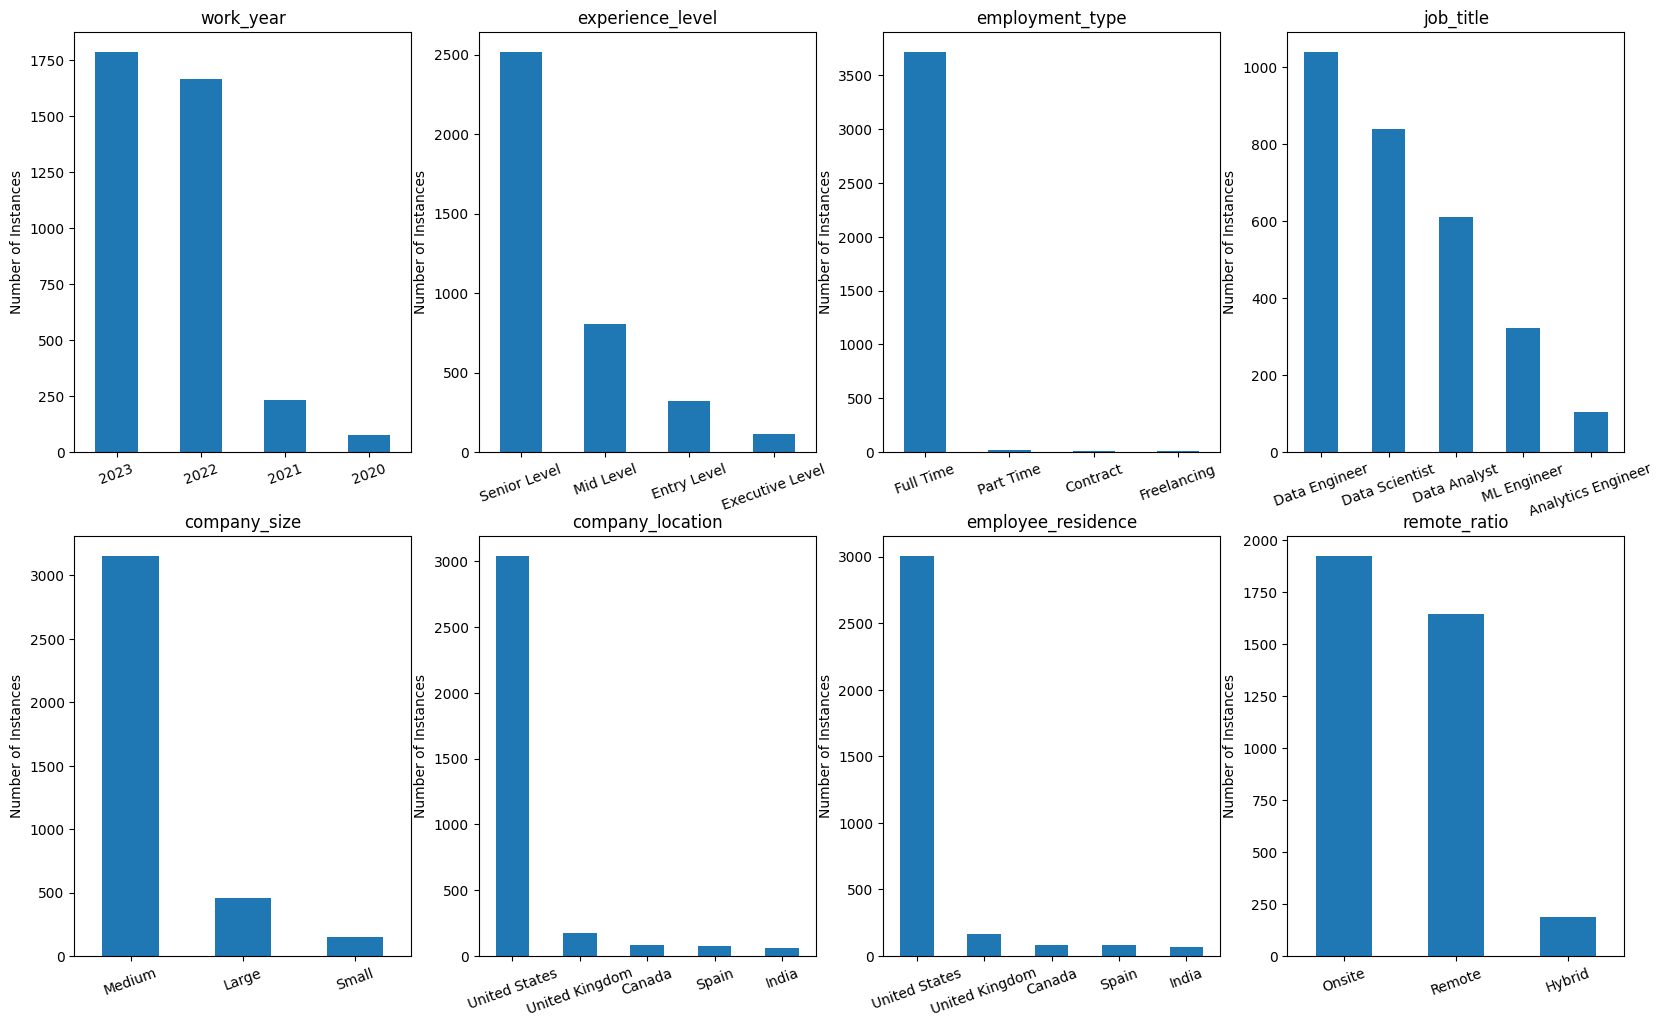

In [20]:
value_count_plot(['work_year','experience_level','employment_type','job_title','company_size','company_location','employee_residence','remote_ratio'])

In [21]:
import seaborn as sns
import scipy.stats as stats

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


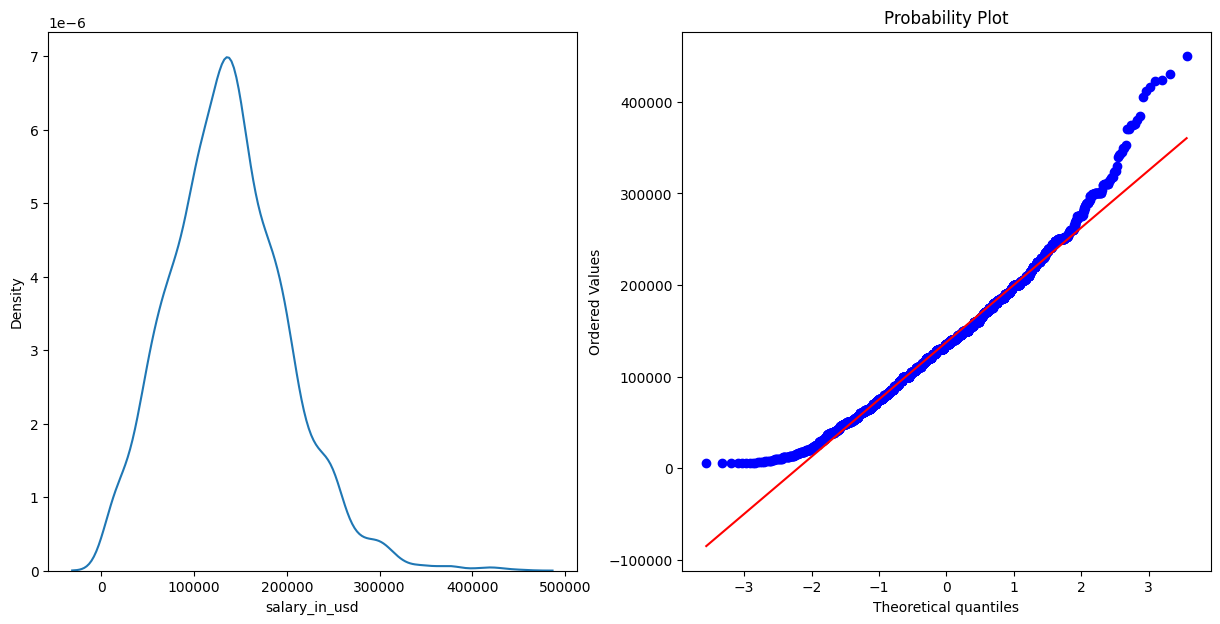

In [22]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.kdeplot(df['salary_in_usd'], ax=ax[0])
stats.probplot(df['salary_in_usd'], plot=ax[1])
plt.show()

<AxesSubplot: >

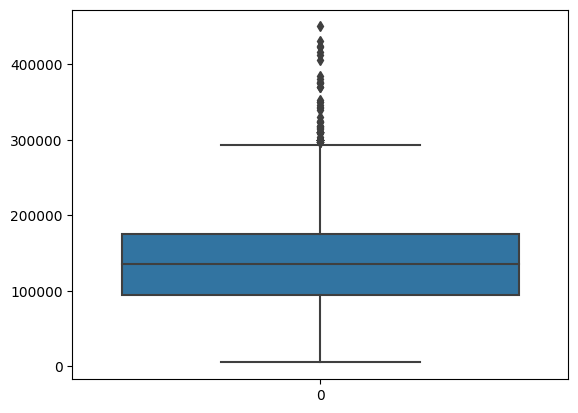

In [23]:
sns.boxplot(df['salary_in_usd'])

In [24]:
df['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

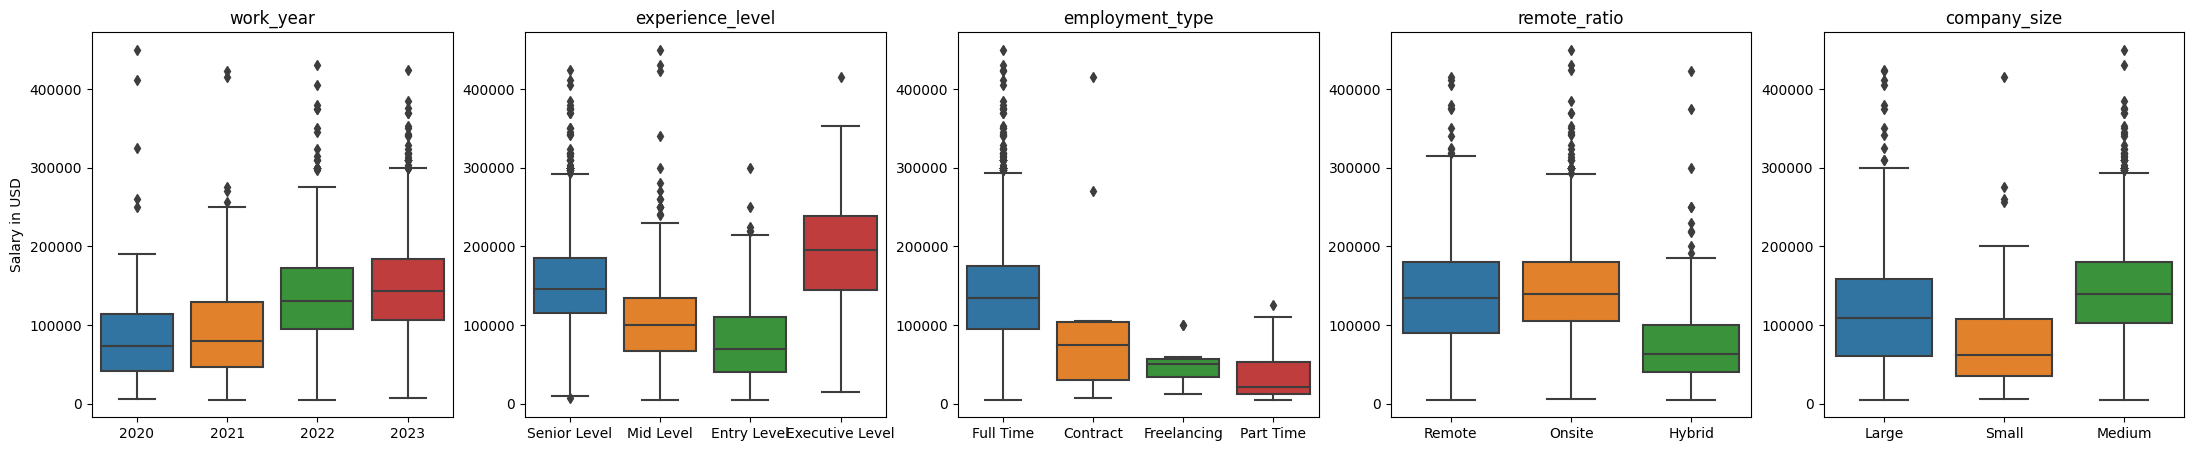

In [25]:
def box_plots(text):
    row = 1
    column = 5
    fig, ax = plt.subplots(row,column,figsize=(27,5))
    j = 0
    for i in text:
        if j<column:
            sns.boxplot(x = df[i], y = df['salary_in_usd'], ax = ax[j])
            ax[0].set_ylabel('Salary in USD')
            ax[j].set_xlabel(None)
            ax[j].set_title(i)
            if j>0:
                ax[j].set_ylabel(None)
            j+=1
box_plots(['work_year','experience_level','employment_type','remote_ratio','company_size'])

/tmp/ipykernel_34/1030545729.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = False).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')


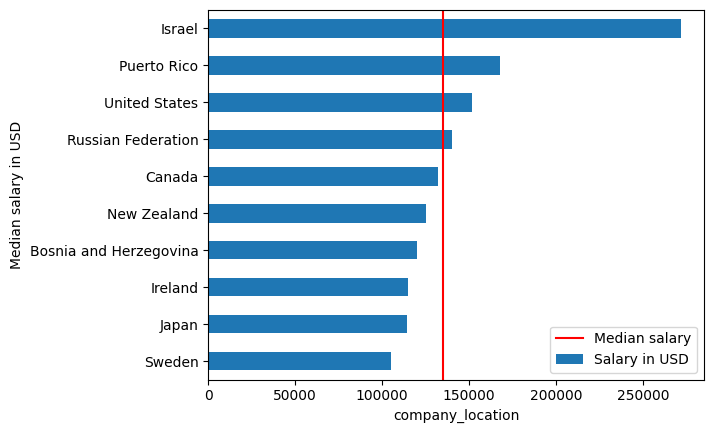

/tmp/ipykernel_34/1030545729.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = False).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')


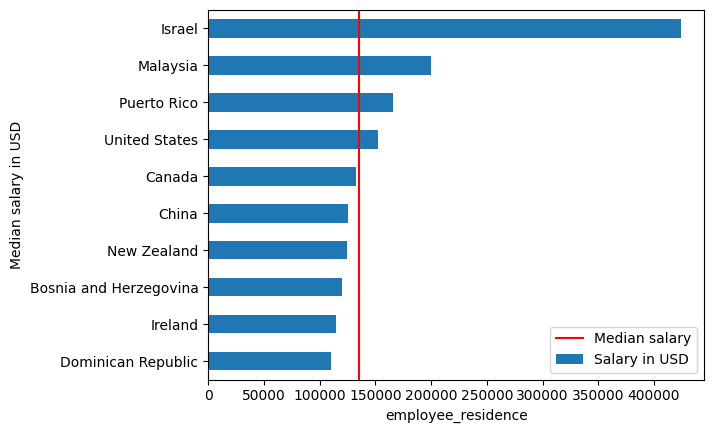

/tmp/ipykernel_34/1030545729.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = False).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')


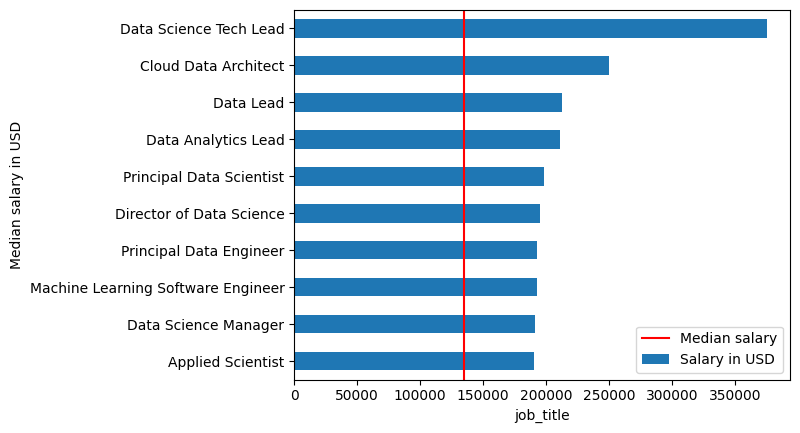

In [26]:
def median_salary_plots(text):
    for i in text:
        df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = False).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')
        plt.axvline(135000,c="red",label="Median salary")
        plt.legend()
        plt.ylabel("Median salary in USD")
        plt.xlabel(i)
        plt.show()
median_salary_plots(['company_location','employee_residence','job_title'])

In [27]:
replace_value('company_location','Puerto Rico','United States')
replace_value('employee_residence','Puerto Rico','United States')

/tmp/ipykernel_34/1030545729.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = False).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')


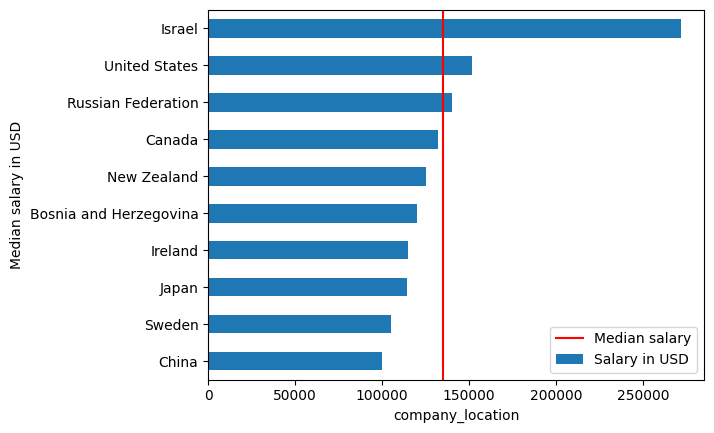

/tmp/ipykernel_34/1030545729.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = False).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')


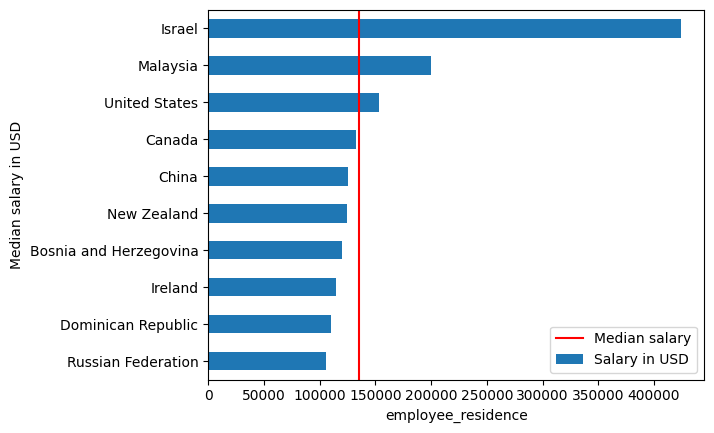

/tmp/ipykernel_34/1030545729.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = False).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')


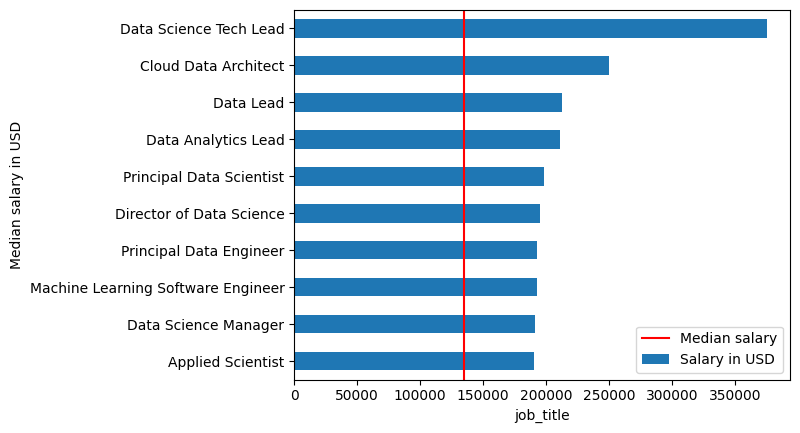

In [29]:
median_salary_plots(['company_location','employee_residence','job_title'])

/tmp/ipykernel_34/1567394862.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = True).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')


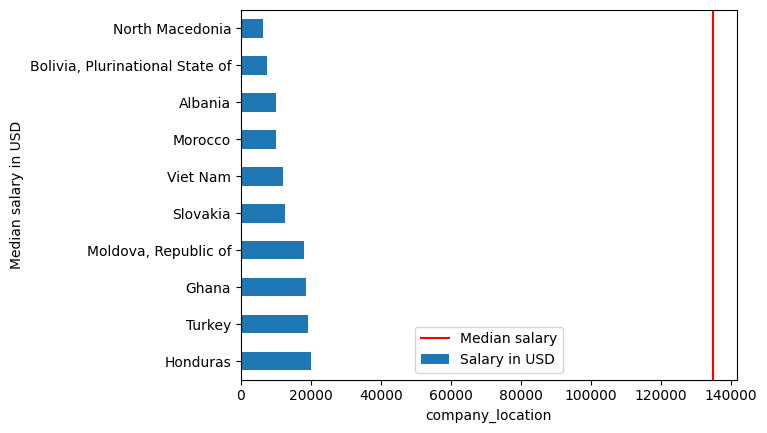

/tmp/ipykernel_34/1567394862.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = True).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')


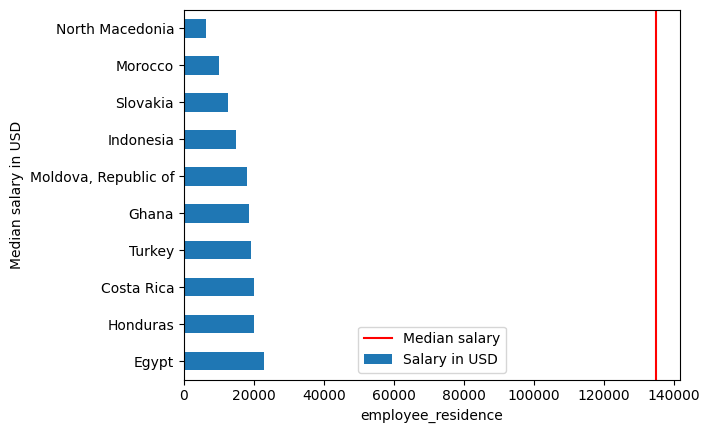

/tmp/ipykernel_34/1567394862.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = True).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')


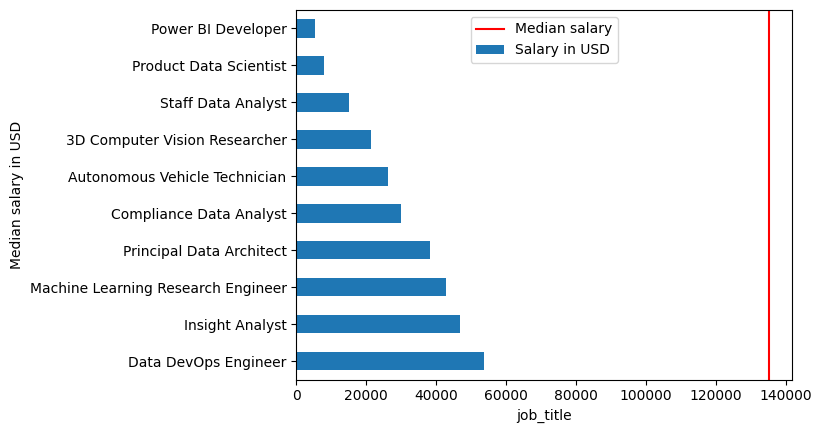

In [30]:
def median_salary_plots_bottom(text):
    for i in text:
        df.groupby(by=i).mean()['salary_in_usd'].sort_values(ascending = True).head(10).iloc[::-1].plot(kind='barh',label='Salary in USD')
        plt.axvline(135000,c="red",label="Median salary")
        plt.legend()
        plt.ylabel("Median salary in USD")
        plt.xlabel(i)
        plt.show()
median_salary_plots_bottom(['company_location','employee_residence','job_title'])

In [32]:
different_location_employee = df[df['employee_residence']!=df['company_location']].shape[0]
different_location_employee

95

In [35]:
different_location_percentage = 100*(different_location_employee/df.shape[0])
print(round(different_location_percentage,2))

2.53


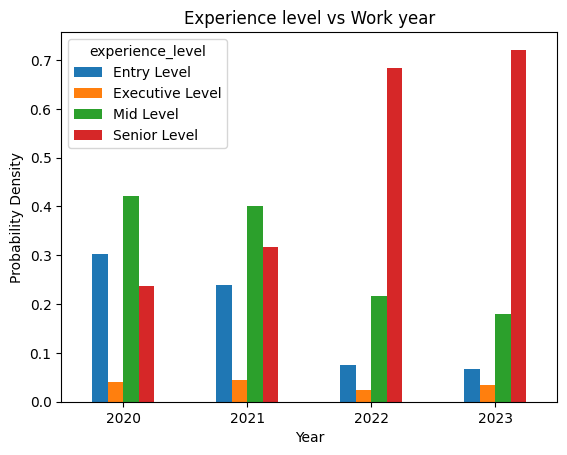

In [37]:
pd.crosstab(df['work_year'],df['experience_level'],normalize="index").plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Probability Density")
plt.title("Experience level vs Work year")
plt.xticks(rotation=0)
plt.show()

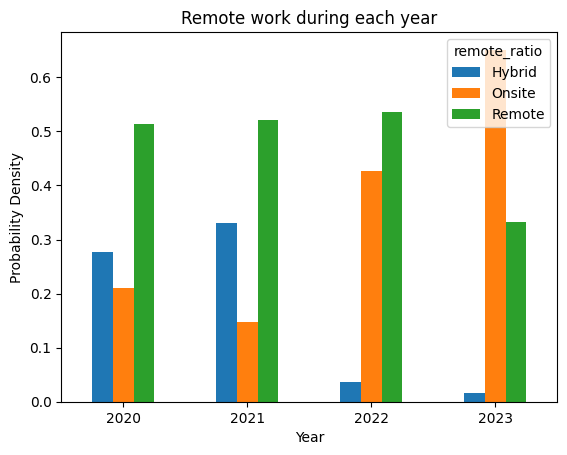

In [38]:
pd.crosstab(df['work_year'],df['remote_ratio'],normalize="index").plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Probability Density")
plt.title("Remote work during each year")
plt.xticks(rotation=0)
plt.show()

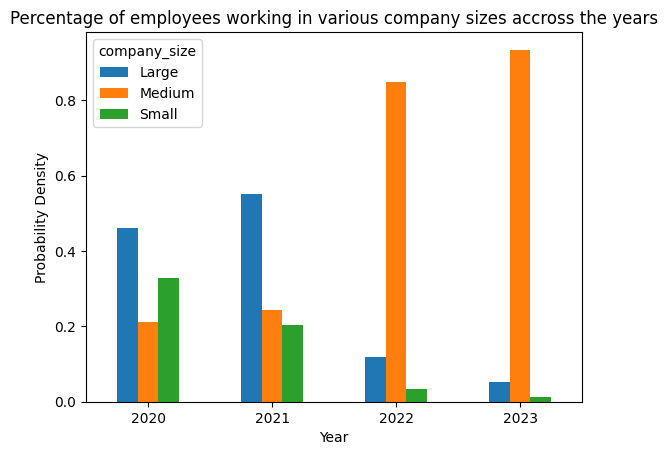

In [39]:
pd.crosstab(df['work_year'],df['company_size'], normalize = 'index').plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.title('Percentage of employees working in various company sizes accross the years')
plt.show()